In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import root_mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

In [52]:
df = pd.read_csv('../../data/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [53]:
df.sample(10)

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
290,15.31,680-684,10000.0,10000.00,36.0
228,24.89,665-669,18000.0,18000.00,60.0
1929,12.42,680-684,12000.0,12000.00,36.0
1084,15.80,675-679,12000.0,12000.00,36.0
1575,13.11,685-689,7000.0,7000.00,36.0
1646,18.49,665-669,14400.0,14400.00,36.0
2356,6.62,805-809,32550.0,32550.00,36.0
264,9.62,805-809,24000.0,23665.54,60.0
431,7.90,715-719,6000.0,6000.00,36.0
728,17.77,670-674,12825.0,12825.00,36.0


In [54]:
df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [55]:
df.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [56]:
encoder = LabelEncoder()
df['fico_range'] = encoder.fit_transform(df['fico_range'])

In [57]:
df.dtypes

interest_rate                 float64
fico_range                      int64
amount_requested              float64
amount_funded_by_investors    float64
loan_length                   float64
dtype: object

In [58]:
df['fico_range'].describe()

count    2498.000000
mean       13.171337
std         6.997416
min         0.000000
25%         8.000000
50%        12.000000
75%        17.000000
max        37.000000
Name: fico_range, dtype: float64

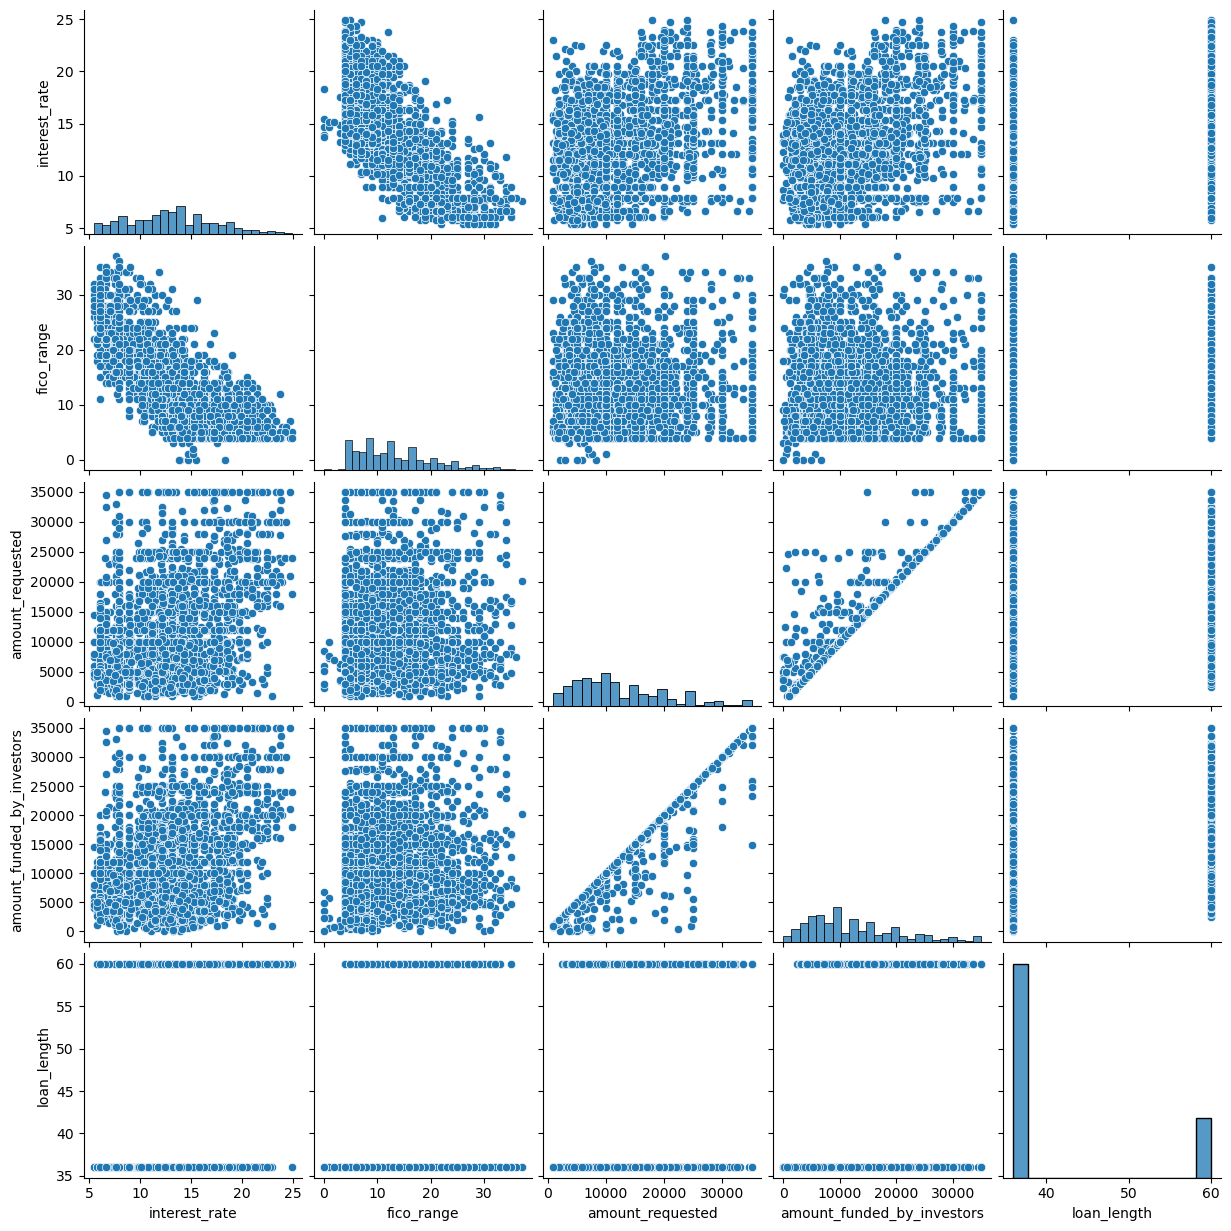

In [59]:
sns.pairplot(df)

#### Notes to scatter matrix

Most Noticable = Interest_rate w/ Amount funded by investors, amount requested.
6/16 shown to have a flat relationship 

#### Project Direction

Loan - Target to explores: 
X = Amount_requested, interest_rate, fico_range
y = loan_length

Investing/Brokerage
X = amount_funded_by_investors, fico_range
y = 


In [60]:
df.columns

Index(['interest_rate', 'fico_range', 'amount_requested',
       'amount_funded_by_investors', 'loan_length'],
      dtype='object')

In [76]:
X = df.drop(columns='loan_length')
y = df['loan_length']
X = sm.add_constant(X)


In [78]:
lin_model = LinearRegression()
lin_model = sm.OLS(y, X).fit()

print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_length   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     388.6
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          2.20e-260
Time:                        17:41:13   Log-Likelihood:                -8674.0
No. Observations:                2498   AIC:                         1.736e+04
Df Residuals:                    2493   BIC:                         1.739e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [83]:
y_preds = lin_model.predict(X)
y_residuals = y - y_preds

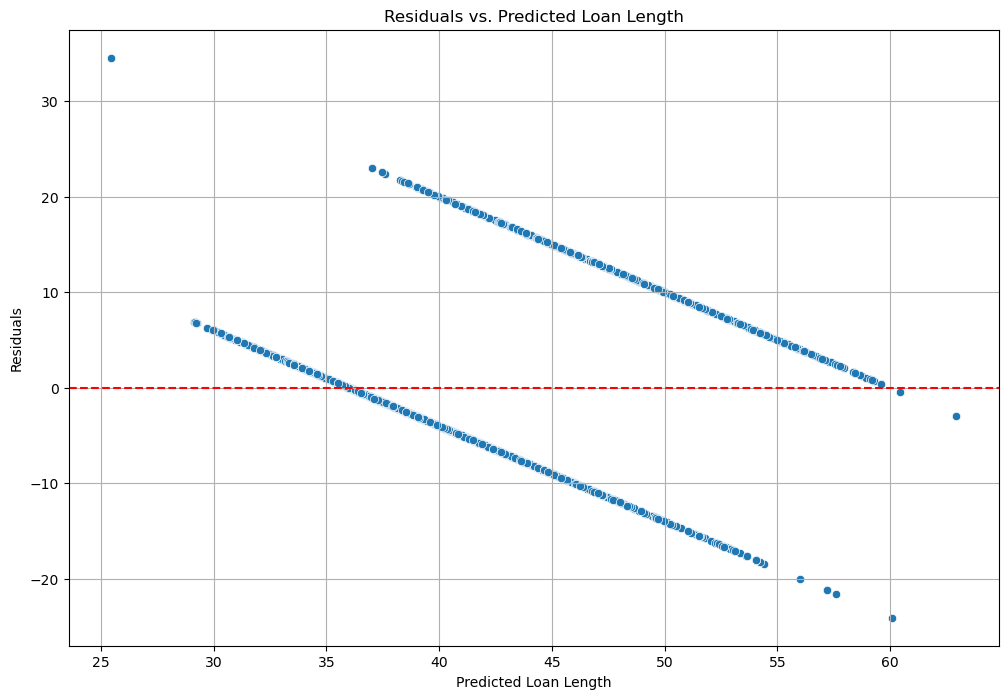

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=y_preds, y=y_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Loan Length')
plt.xlabel('Predicted Loan Length')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()